<a href="https://colab.research.google.com/github/gffiveash/DS4002/blob/main/6_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This script illustrates our multiple linear regression model, which aims to predict a relationship between Charlottesville median housing price, seasonality, and neighborhoods.


In [ ]:
# Connect to GitHub
! git clone https://github.com/gffiveash/DS4002

Cloning into 'DS4002'...
remote: Enumerating objects: 431, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 431 (delta 50), reused 16 (delta 16), pack-reused 358 (from 2)
Receiving objects: 100% (431/431), 4.42 MiB | 9.96 MiB/s, done.
Resolving deltas: 100% (195/195), done.


In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Read the CSV data
df=pd.read_csv('DS4002/DATA/Merged_Final_Data.csv')

In [ ]:
# Visualize data with df.head()
df.head(10)

,Date,Location,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY
0,2020-01-01,"Charlottesville, VA",340,-0.25,-0.000,70,0.06,0.250
1,2020-01-01,"Martha Jefferson, VA",391,NaN,-0.100,6,NaN,-0.140
2,2020-01-01,"Fifeville, VA",204,NaN,0.180,5,NaN,0.000
3,2020-01-01,"Jefferson Park, VA",190,NaN,-0.260,7,NaN,0.400
4,2020-01-01,"Venable, VA",480,NaN,0.899,4,NaN,0.333
5,2020-01-01,"Belmont, VA",300,NaN,-0.135,13,NaN,0.167
6,2020-01-01,"Fry's Spring, VA",340,NaN,-0.020,13,NaN,-0.280
7,2020-02-01,"Martha Jefferson, VA",513,1.28,0.190,4,-0.50,-0.200
8,2020-02-01,"Fry's Spring, VA",459,0.35,0.340,9,-0.31,-0.470
9,2020-02-01,"Jefferson Park, VA",168,-0.12,-0.550,5,-0.29,0.000


In [ ]:
# Convert date from object data type to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
# Grouping by month
df['Month'] = df['Date'].dt.month

#Multi-linear regression with Date and Location features

In [ ]:
# Adding in Location as a feature; first, have to one-hot encode

df = pd.get_dummies(df, columns=['Location'])

In [ ]:
df.head(10)

,Date,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,Month,"Location_Belmont, VA","Location_Charlottesville, VA","Location_Fifeville, VA","Location_Fry's Spring, VA","Location_Jefferson Park, VA","Location_Martha Jefferson, VA","Location_Venable, VA"
0,2020-01-01,340,-0.25,-0.000,70,0.06,0.250,1,False,True,False,False,False,False,False
1,2020-01-01,391,NaN,-0.100,6,NaN,-0.140,1,False,False,False,False,False,True,False
2,2020-01-01,204,NaN,0.180,5,NaN,0.000,1,False,False,True,False,False,False,False
3,2020-01-01,190,NaN,-0.260,7,NaN,0.400,1,False,False,False,False,True,False,False
4,2020-01-01,480,NaN,0.899,4,NaN,0.333,1,False,False,False,False,False,False,True
5,2020-01-01,300,NaN,-0.135,13,NaN,0.167,1,True,False,False,False,False,False,False
6,2020-01-01,340,NaN,-0.020,13,NaN,-0.280,1,False,False,False,True,False,False,False
7,2020-02-01,513,1.28,0.190,4,-0.50,-0.200,2,False,False,False,False,False,True,False
8,2020-02-01,459,0.35,0.340,9,-0.31,-0.470,2,False,False,False,True,False,False,False
9,2020-02-01,168,-0.12,-0.550,5,-0.29,0.000,2,False,False,False,False,True,False,False


In [ ]:
#Creating X and y variables to begin regression

X=df[['Month', 'Location_Charlottesville, VA', 'Location_Fifeville, VA','Location_Fry\'s Spring, VA','Location_Jefferson Park, VA','Location_Martha Jefferson, VA','Location_Belmont, VA','Location_Venable, VA']]
y = df['Median Sale Price']

In [ ]:
# X/y train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform linear regression
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Getting R-Squared
z = model.predict(X_test)
mse = mean_squared_error(y_test, z)
r2 = r2_score(y_test, z)
print(mse)
print(r2)

22429.98171973265
0.5490144115934581


In [ ]:
rmse = np.sqrt(mse)
print(rmse)

149.76642387308527


## Adding Sin/Cosine to capture the cyclical nature of months

In [ ]:
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

In [ ]:
X = df[['Month_sin', 'Month_cos', 'Location_Charlottesville, VA',
        'Location_Fifeville, VA', 'Location_Fry\'s Spring, VA',
        'Location_Jefferson Park, VA', 'Location_Martha Jefferson, VA',
        'Location_Belmont, VA', 'Location_Venable, VA']]
y = df['Median Sale Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
z = model.predict(X_test)
mse = mean_squared_error(y_test, z)
r2 = r2_score(y_test, z)
print(mse)
print(r2)

22589.51645209792
0.545806746690025


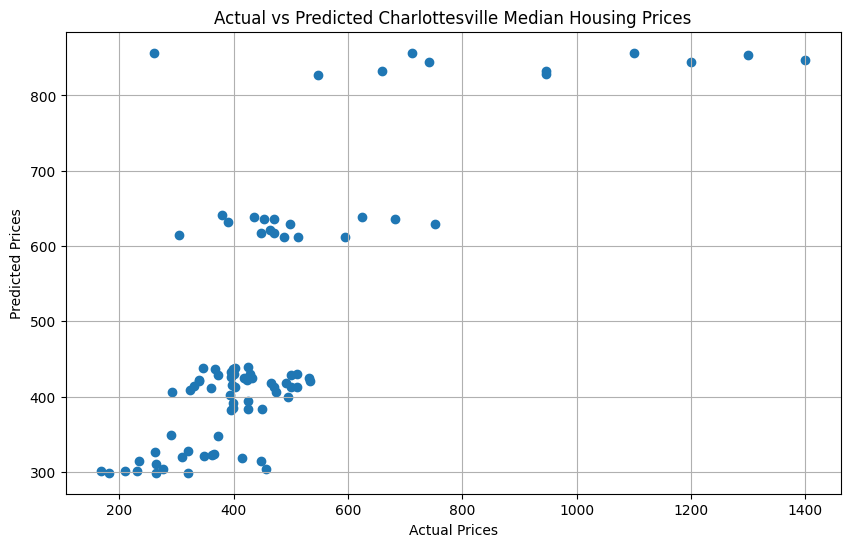

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, z)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Charlottesville Median Housing Prices')
plt.grid(True)
plt.show()

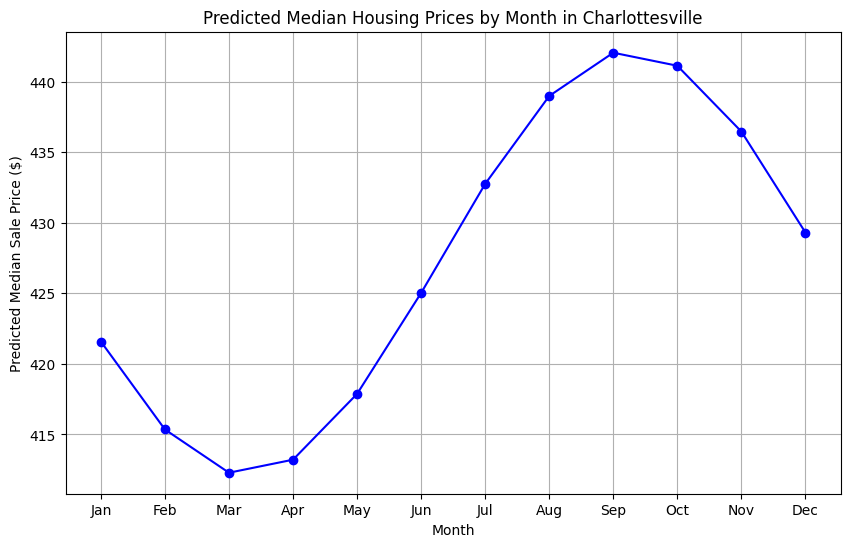

In [ ]:
months = np.arange(1, 13)
prediction_data = pd.DataFrame({
    'Month_sin': np.sin(2 * np.pi * months / 12),
    'Month_cos': np.cos(2 * np.pi * months / 12),
    'Location_Charlottesville, VA': [1]*12,
    'Location_Fifeville, VA': [0]*12,
    'Location_Fry\'s Spring, VA': [0]*12,
    'Location_Jefferson Park, VA': [0]*12,
    'Location_Martha Jefferson, VA': [0]*12,
    'Location_Belmont, VA': [0]*12,
    'Location_Venable, VA': [0]*12
})

monthly_predictions = model.predict(prediction_data)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(months, monthly_predictions, marker='o', color='blue', linestyle='-')
plt.title('Predicted Median Housing Prices by Month in Charlottesville')
plt.xlabel('Month')
plt.ylabel('Predicted Median Sale Price ($)')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [ ]:
# Setting up predicting future median housing prices for Charlottesville,regionally

months = np.arange(1, 13)
samplepredictioncville = pd.DataFrame({
    'Month_sin': np.sin(2 * np.pi * months / 12),
    'Month_cos': np.cos(2 * np.pi * months / 12),
    'Location_Charlottesville, VA': [1]*12,
    'Location_Fifeville, VA': [0]*12,
    'Location_Fry\'s Spring, VA': [0]*12,
    'Location_Jefferson Park, VA': [0]*12,
    'Location_Martha Jefferson, VA': [0]*12,
    'Location_Belmont, VA': [0]*12,
    'Location_Venable, VA': [0]*12})
predicted_pricecville = model.predict(samplepredictioncville)

In [ ]:
print(predicted_pricecville)

[421.58456047 415.35546881 412.29193717 413.2148364  417.87687638
 425.02886727 432.75443889 438.98353055 442.04706219 441.12416296
 436.46212298 429.31013209]


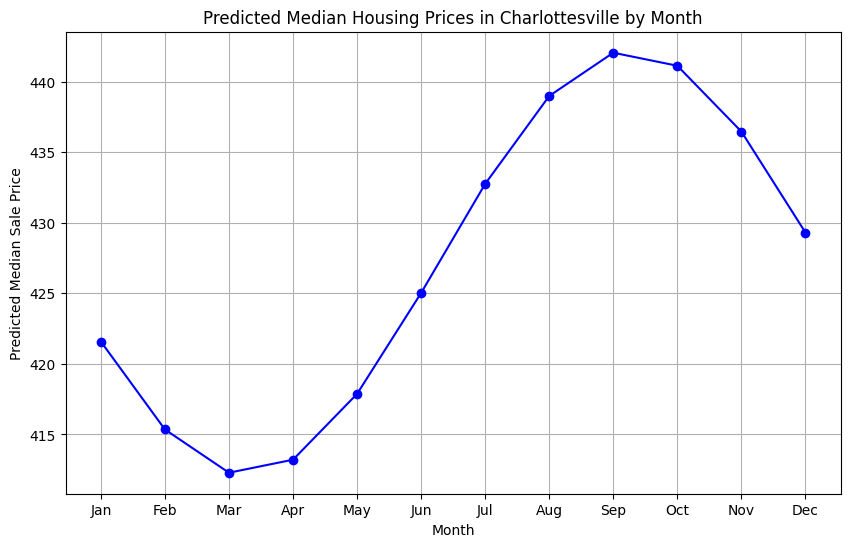

In [ ]:
# Visualizing predicted median housing prices for Charlottesville regionally, as an example

plt.figure(figsize=(10, 6))
plt.plot(months, predicted_pricecville, marker='o', linestyle='-', color='blue')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Predicted Median Sale Price')
plt.title('Predicted Median Housing Prices in Charlottesville by Month')
plt.grid(True)
plt.show()

In [ ]:
# Setting up predicting future median housing prices for Jefferson Park, as an example

months = np.arange(1, 13)
samplepredictionJeffPark = pd.DataFrame({
    'Month_sin': np.sin(2 * np.pi * months / 12),
    'Month_cos': np.cos(2 * np.pi * months / 12),
    'Location_Charlottesville, VA': [0]*12,
    'Location_Fifeville, VA': [0]*12,
    'Location_Fry\'s Spring, VA': [0]*12,
    'Location_Jefferson Park, VA': [1]*12,
    'Location_Martha Jefferson, VA': [0]*12,
    'Location_Belmont, VA': [0]*12,
    'Location_Venable, VA': [0]*12})
predicted_priceJeffPark = model.predict(samplepredictionJeffPark)

In [ ]:
print(predicted_priceJeffPark)

[307.16675932 300.93766765 297.87413601 298.79703524 303.45907522
 310.61106611 318.33663773 324.5657294  327.62926103 326.70636181
 322.04432182 314.89233093]


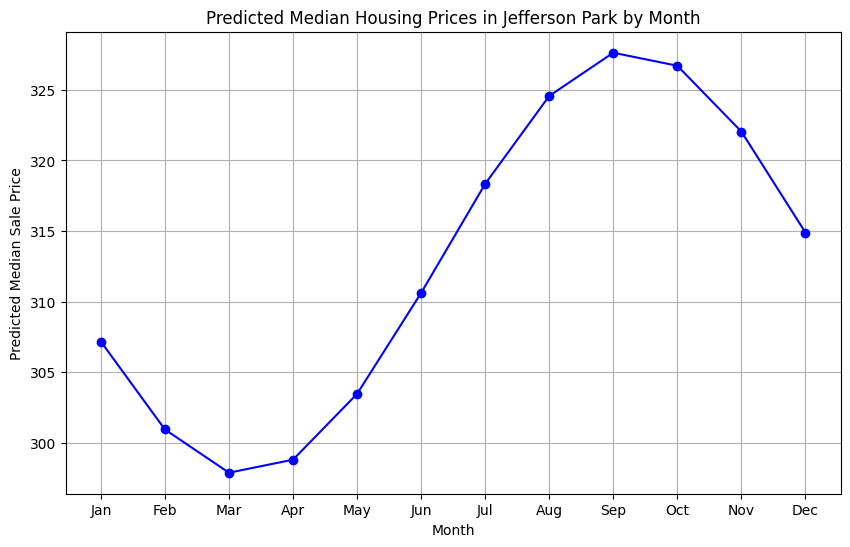

In [ ]:
# Visualizing predicted median housing prices for Jefferson Park, as an example

plt.figure(figsize=(10, 6))
plt.plot(months, predicted_priceJeffPark, marker='o', linestyle='-', color='blue')
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Predicted Median Sale Price')
plt.title('Predicted Median Housing Prices in Jefferson Park by Month')
plt.grid(True)
plt.show()